c:\Users\Binny\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 48.6k/48.6k [00:00<00:00, 207kB/s]

Extracting files...


Path to dataset files: C:\Users\Binny\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2
Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


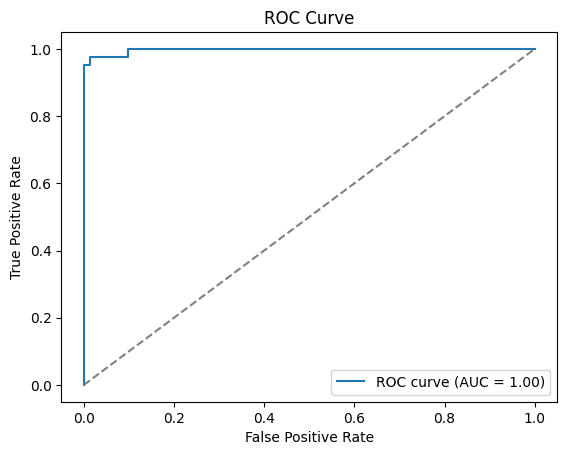


Confusion Matrix with custom threshold 0.3:
[[67  4]
 [ 1 42]]


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("uciml/iris")
print("Path to dataset files:", path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(f"{path}/Iris.csv")

# View first few rows
print(df.head())

# Features and labels
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Try different values of k
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc:.2f}")

# Choose best k (for example, k=5)
k_best = 5
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------------------
# Visualization of decision boundaries (2D)
# -------------------------------------------

# Use only first two features for 2D plot
X_vis = X_scaled[:, :2]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.2, random_state=42, stratify=y)

knn_vis = KNeighborsClassifier(n_neighbors=k_best)
knn_vis.fit(X_vis_train, y_vis_train)

# Meshgrid
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y)[0], edgecolor='k', s=40, cmap=plt.cm.Set1)
plt.title(f"KNN Decision Boundary (k = {k_best}) using first 2 features")
plt.xlabel("Normalized SepalLengthCm")
plt.ylabel("Normalized SepalWidthCm")
plt.show()
